### Libraries' importation

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import os
from bs4 import BeautifulSoup as bs
from sklearn.feature_extraction.text import CountVectorizer
from IPython.core.display import display, HTML
import numpy as np
import pandas as pd
import codecs
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize

### Reading resume and table of contents

In [2]:
resume = open('resume.txt', 'r').read()
print(resume)

Experience

1. Developed probability simulations using NumPy.
2. Assessed online ad-clicks for statistical significance using Permutation testing.
3. Analyzed disease outbreaks using common clustering algorithms.

Additional Skills

1. Data visualization using Matplotlib.
2. Statistical analysis using SciPy.
3. Processing structured tables using Pandas.
4. Executing K-Means clustering and DBSCAN clustering using Scikit-Learn.
5. Extracting locations from text using GeonamesCache.
6. Location analysis and visualization using GeonamesCache and Basemap.
7. Dimensionality reduction with PCA and SVD, using Scikit-Learn.
8. NLP analysis and text topic detection using Scikit-Learn.


In [3]:
table_of_contents = open('table_of_contents.txt', 'r').read()
print(table_of_contents[:100])

Case Study 1: Finding the Winning Strategy in a Card Game.

Section 1: Computing Probabilities Using


In [4]:
cv=resume+table_of_contents

### Reading Html files

In [5]:
Files_names=os.listdir("job_postings")

In [6]:
Files=[]
for i in Files_names:
    Files.append(codecs.open(f"job_postings/{i}", encoding='utf-8').read())

### Creating a dataframe containing both the title and the body of the article

In [7]:
L_soup=[]
for i in Files:
    soup= bs(i,'lxml')
    L_soup.append(soup)

In [8]:
import pandas as pd
html_dict = {'Title': [], 'Body': []}
for soup in L_soup:
    title = soup.find('title').text
    body = soup.find('body').text
    
    html_dict['Title'].append(title)
    html_dict['Body'].append(body)
df_jobs = pd.DataFrame(html_dict)
df_jobs.describe()

,Title,Body
count,1458,1458
unique,1364,1458
top,"Data Scientist - New York, NY","Quantitative Analyst - Seattle, WA\nOur Purpos..."
freq,13,1


In [9]:
text_list = df_jobs.Body.values.tolist() + [cv]
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(text_list).toarray()

In [10]:
np.random.seed(0)

def shrink_matrix(tfidf_matrix):
    svd_object = TruncatedSVD(n_components=100)
    shrunk_matrix = svd_object.fit_transform(tfidf_matrix)
    return normalize(shrunk_matrix)

shrunk_norm_matrix = shrink_matrix(tfidf_matrix)
print(f"We've dimensionally reduced a {tfidf_matrix.shape[1]}-column " f"{type(tfidf_matrix)} matrix.")
print(f"Our output is a {shrunk_norm_matrix.shape[1]}-column " f"{type(shrunk_norm_matrix)} matrix.")

We've dimensionally reduced a 30530-column <class 'numpy.ndarray'> matrix.
Our output is a 100-column <class 'numpy.ndarray'> matrix.


### Searching the best number of clusters

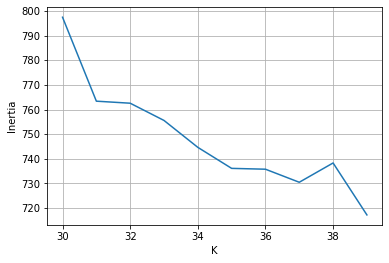

In [11]:
np.random.seed(0)
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
def generate_elbow_plot(matrix):
    k_values = range(30, 40)
    inertia_values = [MiniBatchKMeans(k).fit(shrunk_norm_matrix).inertia_
                      for k in k_values]
    plt.plot(k_values, inertia_values)
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

generate_elbow_plot(shrunk_norm_matrix)

### Fitting our model

In [12]:
true_k = 31
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(shrunk_norm_matrix)

KMeans(max_iter=100, n_clusters=31, n_init=1)

In [13]:
df_jobs['Cluster']=pd.Series(model.labels_)

In [14]:
df_jobs[-20:]

,Title,Body,Cluster
1438,"Data Science Intern - Sunnyvale, CA 94085","Data Science Intern - Sunnyvale, CA 94085\nJob...",20
1439,"Systems Engineer Principal - El Segundo, CA","Systems Engineer Principal - El Segundo, CA\nJ...",14
1440,"Data Scientist (PhD) - Intern - Spring, TX","Data Scientist (PhD) - Intern - Spring, TX\nJo...",5
1441,Computer Science and Engineering: Assistant Pr...,Computer Science and Engineering: Assistant Pr...,13
1442,"Patient Care Assistant, Surgical (Gynecology/U...","Patient Care Assistant, Surgical (Gynecology/U...",30
1443,"Lead Data Scientist - Portland, OR 97239","Lead Data Scientist - Portland, OR 97239\nOver...",22
1444,"Software Engineer - Mobile (Jr) - Chantilly, VA","Software Engineer - Mobile (Jr) - Chantilly, V...",14
1445,2020 Summer Intern: Modeling Analyst - Charlot...,2020 Summer Intern: Modeling Analyst - Charlot...,10
1446,"Post-Doctoral Scientist - Foggy Bottom, DC","Post-Doctoral Scientist - Foggy Bottom, DC\nTh...",13
1447,"Software Product Manager, Framework and Applic...","Software Product Manager, Framework and Applic...",18


In [15]:
df_jobs['Cluster'].value_counts()

8     189
20    132
22     96
12     73
18     69
4      67
2      60
6      57
17     56
27     56
29     52
10     46
15     45
9      39
1      39
5      38
24     37
3      35
16     30
7      30
25     30
13     29
30     25
0      23
14     22
11     21
23     18
28     17
21     11
26     11
19      5
Name: Cluster, dtype: int64

### Adding the cv so we can give some weight to our searched subject

In [16]:
def similarity_cv_text(bullet_texts):
    vectorizer = TfidfVectorizer(stop_words='english')
    matrix = vectorizer.fit_transform(bullet_texts + [resume])
    matrix = matrix.toarray()
    return matrix[:-1] @ matrix[-1]

In [17]:
L_similarity={}
for i in df_jobs['Cluster'].unique():
    df_jobs_X=df_jobs.loc[df_jobs['Cluster']==i]
    L_similarity[i]=similarity_cv_text(df_jobs_X['Body']).mean()

In [18]:
L_similarity

{8: 0.2090853478769547,
 27: 0.13953468423421084,
 20: 0.17806155488025383,
 30: 0.1933146667069643,
 4: 0.14886610294607946,
 22: 0.15261217538514843,
 18: 0.16912201955909015,
 10: 0.15050612379627065,
 15: 0.1853336158353124,
 24: 0.28745440939994527,
 16: 0.3277176211024695,
 28: 0.4288150657654059,
 7: 0.23854403923765494,
 1: 0.20649440274873707,
 12: 0.15956360229641023,
 5: 0.30183909610947746,
 29: 0.13009544829403302,
 23: 0.4830695152379409,
 2: 0.12834674793478815,
 26: 0.4441469753240428,
 9: 0.11633348525760684,
 0: 0.314154272134698,
 11: 0.3929736456893789,
 17: 0.16159256545487596,
 6: 0.18485037479657798,
 3: 0.16287212126503217,
 21: 0.305686691059813,
 13: 0.1857557523956867,
 14: 0.21957543846713123,
 25: 0.20062160921640643,
 19: 0.9298383141477319}

In [19]:
df_jobs[df_jobs['Cluster']==3]

,Title,Body,Cluster
98,Environmental Compliance Coordinator - Raleigh...,Environmental Compliance Coordinator - Raleigh...,3
110,"HR/Controller Dual - Lompoc, CA 93436","HR/Controller Dual - Lompoc, CA 93436\nPurpose...",3
142,"Regional Sales Manager-5 - Denver, CO","Regional Sales Manager-5 - Denver, CO\nCircle ...",3
156,"Store Assistant (Bonused) - St. Louis, MO","Store Assistant (Bonused) - St. Louis, MO\nCir...",3
163,"Real Estate Analyst - Tampa, FL","Real Estate Analyst - Tampa, FL\nCircle K is a...",3
289,"Asset Managmenet Analyst - Kissimmee, FL","Asset Managmenet Analyst - Kissimmee, FL\nGene...",3
291,"Accounting Associate - Tempe, AZ","Accounting Associate - Tempe, AZ\nCircle K is ...",3
357,"Production Manager - Hayward, CA 94541","Production Manager - Hayward, CA 94541\nProduc...",3
372,"Director Finance - Charlotte, NC","Director Finance - Charlotte, NC\nCircle K is ...",3
451,"Fuel Pricing Analyst - Charlotte, NC","Fuel Pricing Analyst - Charlotte, NC\nCircle K...",3


### Adding lists to our dataframe

In [21]:
df_jobs['li'] = [[bullet.text.strip() 
                      for bullet in soup.find_all('li')]
                      for soup in L_soup]

In [22]:
df_jobs

,Title,Body,Cluster,li
0,"Data Scientist - Beavercreek, OH","Data Scientist - Beavercreek, OH\nData Scienti...",8,[Use statistical research methods to analyze d...
1,"Data Scientist - Seattle, WA 98101","Data Scientist - Seattle, WA 98101\nAre you in...",27,[Interface with our internal engagement teams ...
2,"Data Scientist - Newark, CA","Data Scientist - Newark, CA\nData Scientist\n\...",20,"[Design, develop, document and maintain machin..."
3,Patient Care Assistant / PCA - Med/Surg (Fayet...,Patient Care Assistant / PCA - Med/Surg (Fayet...,30,[Provides all personal care services in accord...
4,"Data Manager / Analyst - Oakland, CA","Data Manager / Analyst - Oakland, CA\nHOW YOU ...",4,[You possess excellent communication and relat...
...,...,...,...,...
1453,"Data Scientist - Glen Mills, PA","Data Scientist - Glen Mills, PA\nSSRS Data Sci...",8,"[Use machine learning methods (e.g., cluster a..."
1454,"Data Analyst (Part-Time) - Austin, TX","Data Analyst (Part-Time) - Austin, TX\nABOUT S...",27,[Performing ad-hoc statistical analysis (linea...
1455,Manager - Business Development (Central and Ea...,Manager - Business Development (Central and Ea...,9,[Drive New Sales from prospective clients with...
1456,Natural Language Processing Undergraduate Inte...,Natural Language Processing Undergraduate Inte...,6,[Design and implement experiments to test new ...


#### Discovering some clusters

In [24]:
df_jobs_8=df_jobs.loc[df_jobs['Cluster']==8]

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def rank_words(text_list):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(text_list).toarray()
    df = pd.DataFrame({'Words': vectorizer.get_feature_names(),
                       'TFIDF': tfidf_matrix.sum(axis=0)})
    sorted_df = df.sort_values('TFIDF', ascending=False)
    return sorted_df

all_li = []
for li_list in df_jobs_8.li:
    all_li.extend(li_list)

sorted_df = rank_words(all_li)
print(sorted_df[:10].to_string(index=False))

      Words      TFIDF
       data 202.965666
 experience 150.748497
   business  76.905053
   analysis  69.311164
      years  66.817533
    science  65.751759
     skills  61.897154
statistical  58.339353
    ability  53.821292
   learning  53.111730


In [26]:
df_jobs_0=df_jobs.loc[df_jobs['Cluster']==0]

In [27]:
all_li = []
for li_list in df_jobs_0.li:
    all_li.extend(li_list)

sorted_df = rank_words(all_li)
print(sorted_df[:10].to_string(index=False))

     Words     TFIDF
experience 10.445149
    skills  9.910651
  learning  7.000692
      data  6.770905
    strong  6.299456
   ability  5.852389
    python  5.802643
  analysis  5.748045
 excellent  5.670245
   machine  5.550355


### Finding most important words in each group

In [28]:
L_similarity={}
for i in df_jobs['Cluster'].unique():
    df_jobs_X=df_jobs.loc[df_jobs['Cluster']==i]
    all_li = []
    for li_list in df_jobs_X.li:
        all_li.extend(li_list)

    sorted_df = rank_words(all_li)
    print("\n\nCluster ",i,"\n\n",sorted_df[:10].to_string(index=False))
    



Cluster  8 

       Words      TFIDF
       data 202.965666
 experience 150.748497
   business  76.905053
   analysis  69.311164
      years  66.817533
    science  65.751759
     skills  61.897154
statistical  58.339353
    ability  53.821292
   learning  53.111730


Cluster  27 

      Words     TFIDF
      data 43.401969
experience 41.944793
    skills 27.596930
  business 24.844347
 marketing 24.694412
 analytics 24.566455
  analysis 21.139924
     years 20.386946
    strong 19.654508
   ability 18.101664


Cluster  20 

      Words      TFIDF
      data 106.375951
experience 103.152410
  learning  81.746278
   machine  64.927218
   science  51.836387
    python  45.944246
    skills  42.072861
    models  39.612810
     years  35.752799
   ability  35.430828


Cluster  30 

       Words     TFIDF
    patient 19.815211
       care 12.020111
   performs  7.771817
         rn  7.771801
   patients  7.698421
     duties  7.689491
   assigned  6.961963
appropriate  6.314280
 procedur